## A pipeline for importing Transcriptomic data to DF using Seurat 
### Sample F8_37

In [1]:
library(Seurat)

Attaching SeuratObject

Attaching sp



In [2]:
if (FALSE) {
# For output from CellRanger < 3.0
data_dir <- '/home/kv64/Desktop/science_papers/spatial_ml_tumor/human/F8_38'
list.files(data_dir) # Should show barcodes.tsv, genes.tsv, and matrix.mtx
expression_matrix <- Read10X(data.dir = data_dir)
seurat_object = CreateSeuratObject(counts = expression_matrix)

# For output from CellRanger >= 3.0 with multiple data types
data_dir <- '/home/kv64/Desktop/science_papers/spatial_ml_tumor/human/F8_38'
list.files(data_dir) # Should show barcodes.tsv.gz, features.tsv.gz, and matrix.mtx.gz
data <- Read10X(data.dir = data_dir)
seurat_object = CreateSeuratObject(counts = data$`Gene Expression`)
seurat_object[['Protein']] = CreateAssayObject(counts = data$`Antibody Capture`)
}

### 1. (previous) Read data to a Seurat object 

In [1]:
library(dplyr)
library(Seurat)
library(patchwork)
library(hdf5r)
library(SpatialExperiment)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject

Attaching sp

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, c

In [2]:
spatial_folder_loc = "../new_outs/human_outs/F8_37_outs/spatial"
outs_folder_loc = "../new_outs/human_outs/F8_37_outs"
tissue_pos_loc = "../new_outs/human_outs/F8_37_outs/spatial/tissue_positions_list.csv"

In [3]:
#Previous Method:
if(FALSE){
# Load the PBMC dataset
pbmc.data <- Read10X(data.dir = "/home/kv64/Desktop/science_papers/spatial_ml_tumor/human/F8_38/outs/filtered_feature_bc_matrix")
# Initialize the Seurat object with the raw (non-normalized data).
pbmc <- CreateSeuratObject(counts = pbmc.data, project = "pbmc3k", min.cells = 3, min.features = 200)
pbmc
}

#New Method:
img_F8_37 <- Read10X_Image(spatial_folder_loc,
                     image.name = "tissue_lowres_image.png",
                     filter.matrix = TRUE)

#Creating Seurat Object
visObj_F8_37 <-Load10X_Spatial(
  outs_folder_loc,
  filename = "filtered_feature_bc_matrix.h5",
  assay = "Spatial",
  slice = "F8_37",
  filter.matrix = TRUE,
  to.upper = FALSE,
  image = img_F8_37)

#Converts the gene expression counts to integers
visObj_F8_37@images[["F8_37"]]@coordinates[["tissue"]] <- as.integer(visObj_F8_37@images[["F8_37"]]@coordinates[["tissue"]])
visObj_F8_37@images[["F8_37"]]@coordinates[["row"]] <- as.integer(visObj_F8_37@images[["F8_37"]]@coordinates[["row"]])
visObj_F8_37@images[["F8_37"]]@coordinates[["col"]] <- as.integer(visObj_F8_37@images[["F8_37"]]@coordinates[["col"]])
visObj_F8_37@images[["F8_37"]]@coordinates[["imagerow"]] <- as.integer(visObj_F8_37@images[["F8_37"]]@coordinates[["imagerow"]])
visObj_F8_37@images[["F8_37"]]@coordinates[["imagecol"]] <- as.integer(visObj_F8_37@images[["F8_37"]]@coordinates[["imagecol"]])

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from f8_37_ to f837_”


### Standard pre-processing workflow  (N/A)

In [4]:
# pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")

In [5]:
# # Visualize QC metrics as a violin plot
# VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [6]:
# plot1 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "percent.mt")
# plot2 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
# plot1 + plot2

### 2. Normalizing the data

In [7]:
#pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)

In [8]:
#pbmc <- NormalizeData(pbmc)

In [9]:
#SCTransform:
visObj_F8_37 = SCTransform(visObj_F8_37, assay = "Spatial", verbose = FALSE)

### 3. Identification of highly variable features (recommended Top 2000) 

In [10]:
# pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

# # Identify the 10 most highly variable genes
# top10 <- head(VariableFeatures(pbmc), 10)

# # plot variable features with and without labels
# plot1 <- VariableFeaturePlot(pbmc)
# plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
# plot2 #+ plot2

### 4. Scalind data center around zeros for all genes

In [11]:
# all.genes <- rownames(pbmc)
# pbmc <- ScaleData(pbmc, features = all.genes)

### 5. Dimensionality reduction using PCA for all genes

In [12]:
# pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))

### 6. Scalind data center around zeros for top 2000 features

In [13]:
#pbmc <- ScaleData(pbmc)

In [14]:
#Same # of features as pbmc:
visObj_F8_37

An object of class Seurat 
56920 features across 3524 samples within 2 assays 
Active assay: SCT (19187 features, 3000 variable features)
 1 other assay present: Spatial
 1 image present: F8_37

In [15]:
# as.data.frame(Seurat::pbmc,Seurat::VariableFeatures(Seurat::pbmc))

In [16]:
# data_to_write_out <- as.data.frame(as.matrix(Seurat::pbmc))

In [17]:
#var_genes <- VariableFeatures(pbmc)
#seurat_df <- as.data.frame(GetAssayData(pbmc))#[var_genes,]

In [18]:
seurat_df <- as.data.frame(GetAssayData(visObj_F8_37))

In [19]:
dim(seurat_df)

[1] 19187  3524

## Select human genes

In [20]:
tmp3 <- seurat_df[c('LDHA', 'GREB1', 'TFF1', 'FASN', 'MKI67','PCNA'),]

seurat_df2 <- t(tmp3) # transpose 

In [21]:
seurat_df2 = as.data.frame(seurat_df2)

In [22]:
seurat_df2$barcode <- row.names(seurat_df2)

In [23]:
head(seurat_df2, 5)

,LDHA,GREB1,TFF1,FASN,MKI67,PCNA,barcode
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AAACAAGTATCTCCCA-1,0.6931472,1.3862944,5.099866,2.890372,1.386294,0.6931472,AAACAAGTATCTCCCA-1
AAACAATCTACTAGCA-1,2.1972246,0.0000000,4.574711,2.772589,0.000000,0.6931472,AAACAATCTACTAGCA-1
AAACAGAGCGACTCCT-1,1.6094379,1.0986123,4.143135,2.564949,0.000000,1.0986123,AAACAGAGCGACTCCT-1
AAACAGCTTTCAGAAG-1,1.6094379,0.6931472,5.087596,2.484907,0.000000,0.0000000,AAACAGCTTTCAGAAG-1
AAACAGGGTCTATATT-1,1.3862944,0.6931472,5.049856,3.091042,0.000000,1.0986123,AAACAGGGTCTATATT-1


### Read and attach coordinates

In [24]:
#data <- read.csv("/home/kv64/Desktop/science_papers/spatial_ml_tumor/human/F8_38/outs/spatial/tissue_positions.csv")

data <- read.csv(tissue_pos_loc)

In [25]:
total <- merge(seurat_df2, data, by = "barcode")

In [26]:
head(total, 5)

,barcode,LDHA,GREB1,TFF1,FASN,MKI67,PCNA,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,AAACAAGTATCTCCCA-1,0.6931472,1.3862944,5.099866,2.890372,1.386294,0.6931472,1,50,102,1465,1693
2,AAACAATCTACTAGCA-1,2.1972246,0.0000000,4.574711,2.772589,0.000000,0.6931472,1,3,43,332,871
3,AAACAGAGCGACTCCT-1,1.6094379,1.0986123,4.143135,2.564949,0.000000,1.0986123,1,14,94,596,1580
4,AAACAGCTTTCAGAAG-1,1.6094379,0.6931472,5.087596,2.484907,0.000000,0.0000000,1,43,9,1300,401
5,AAACAGGGTCTATATT-1,1.3862944,0.6931472,5.049856,3.091042,0.000000,1.0986123,1,47,13,1396,457


In [27]:
library(lattice)

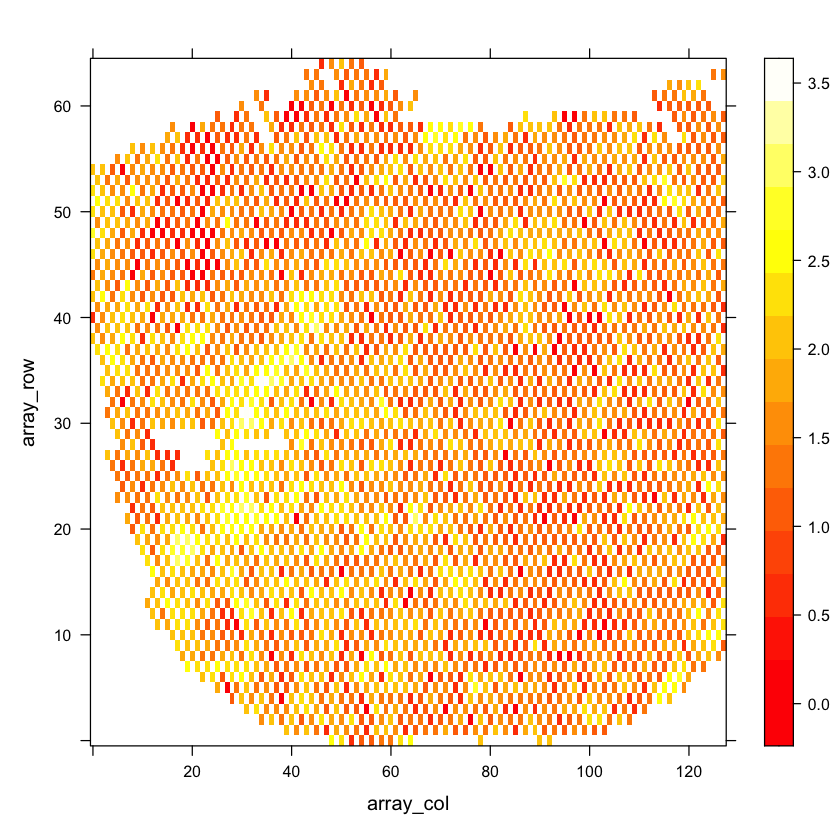

In [28]:
#image(xtabs(LDHA~array_col+array_row, total))
levelplot(LDHA~array_col+array_row, data=total, col.regions=heat.colors(100))

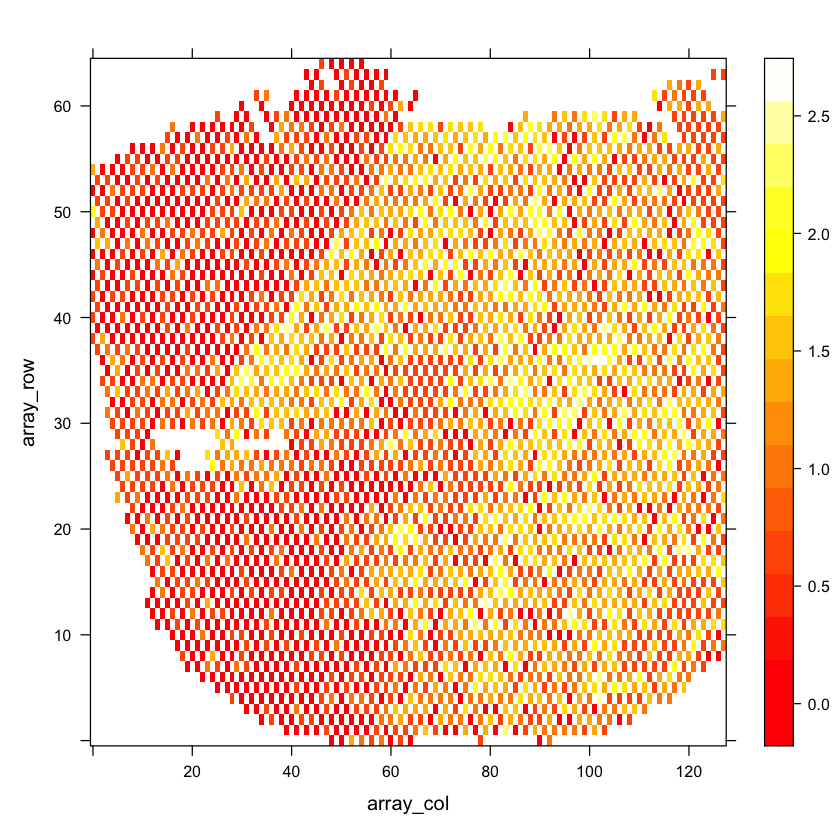

In [29]:
levelplot(GREB1~array_col+array_row, data=total, col.regions=heat.colors(100))
#image(xtabs(GREB1~array_col+array_row, total))

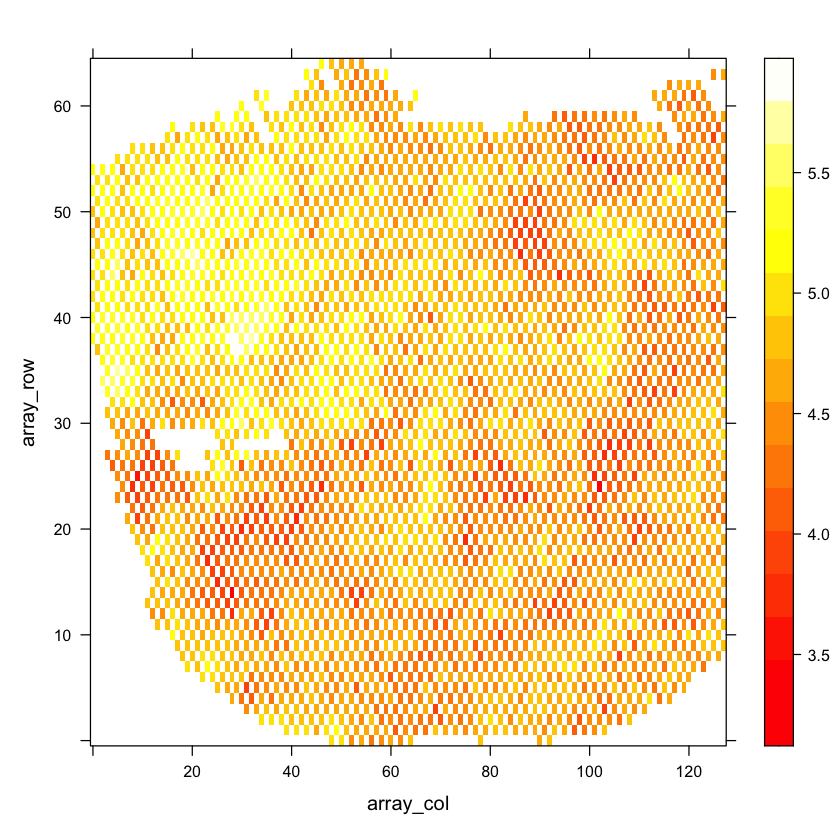

In [30]:
levelplot(TFF1~array_col+array_row, data=total, col.regions=heat.colors(100))
#image(xtabs(TFF1~array_col+array_row, total))

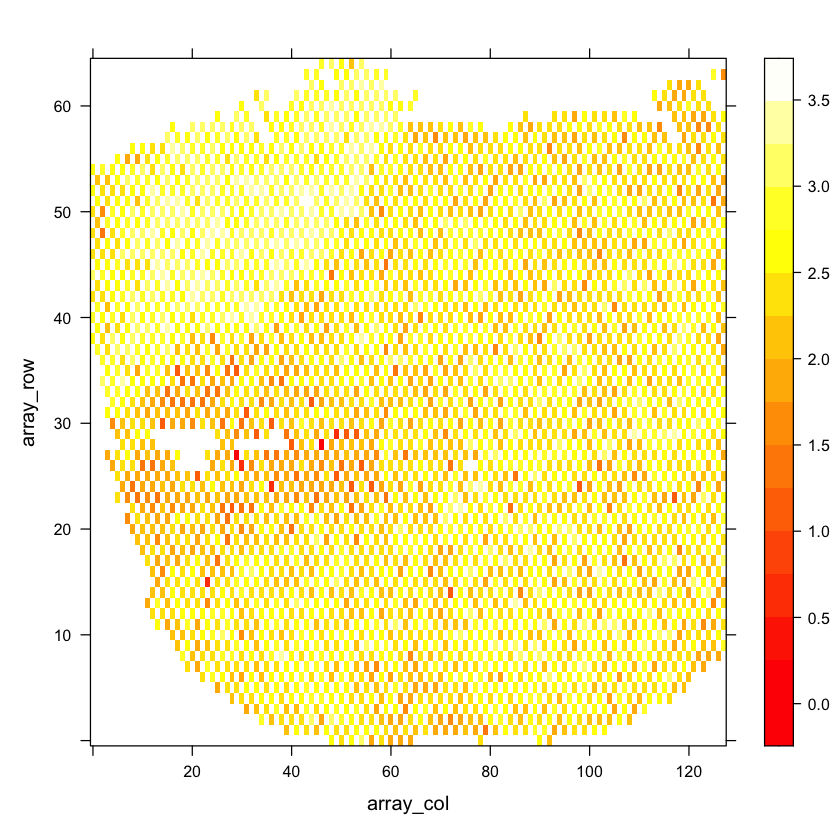

In [31]:
levelplot(FASN~array_col+array_row, data=total, col.regions=heat.colors(100))

### Save to a csv file

In [32]:
write.csv(total,"f837.csv", row.names = FALSE)

## Spatial Experiment Visualizations:

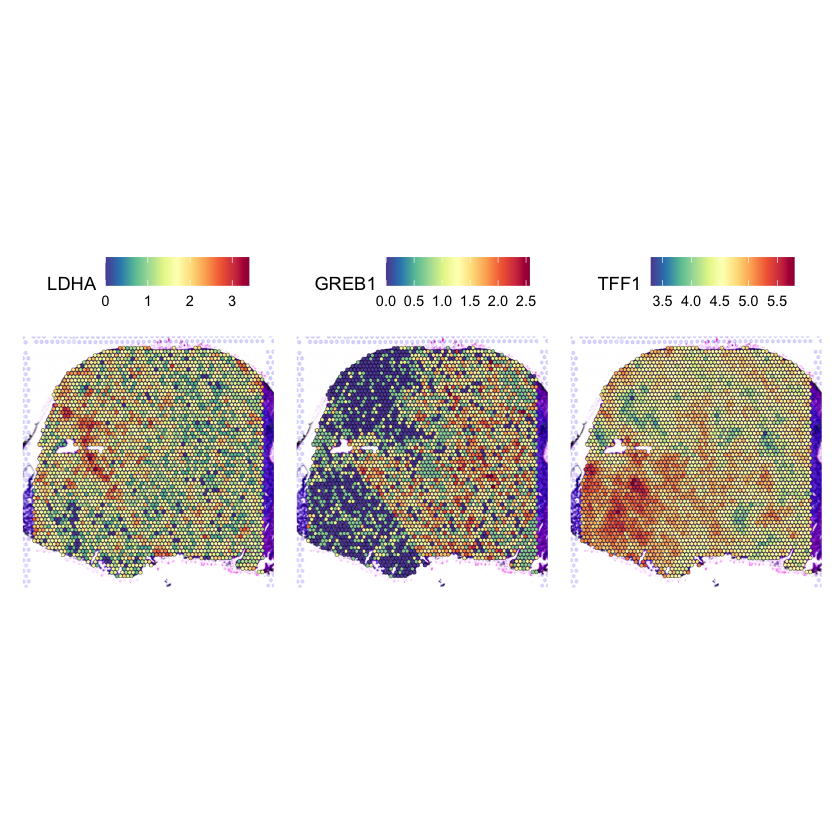

In [33]:
SpatialFeaturePlot(object = visObj_F8_37, features = c('LDHA', 'GREB1', 'TFF1'))

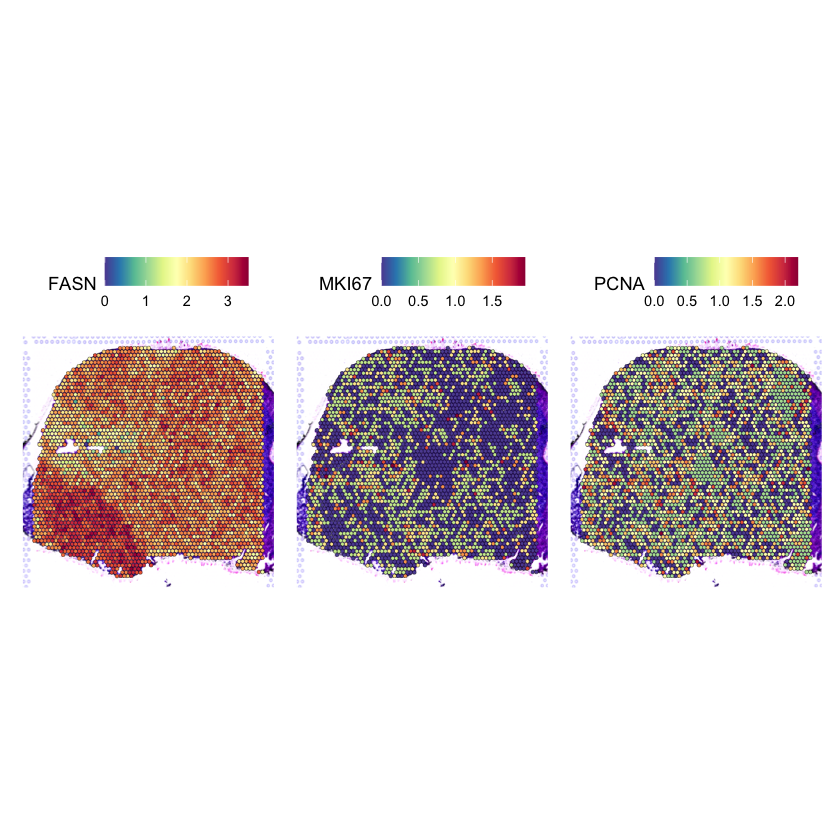

In [34]:
SpatialFeaturePlot(object = visObj_F8_37, features= c('FASN', 'MKI67','PCNA'))